In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import observations as obs

In [2]:
def plot(Xm, Pm, Ym):
    # Xm, Pm, Ym = Xm[:100], Pm[:100], Ym[:100]
    
    Pt = np.array([Pm[i, item] for i, item in enumerate(Ym)])
    p_diff = ((np.max(Pm, axis=1)).reshape(-1, 1) - Pt).flatten()    
    sorted_indices = np.argsort(p_diff)
    
    Xm = Xm[sorted_indices]
    Pm = Pm[sorted_indices]
    Ym = Ym[sorted_indices]
    
    fig, axes = plt.subplots(10, 20, figsize=(18, 10))
    axes = axes.flatten()
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
    for i, (xm, pm, ys) in enumerate(zip(Xm, Pm, Ym)):
        ax1, ax2 = axes[2*i], axes[2*i+1]
        ax1.imshow(xm.reshape(28, 28))
        ax2.bar(np.arange(10), pm)
        ax2.bar([np.argmax(pm)], [pm.max()], color="orange")
        ax2.bar(ys, pm[ys], color="red")
        ax2.text(-0.3, .85, str(ys), color="r", fontsize=8)
        ax2.text(7.1, .85, [np.argmax(pm)], color="orange", fontsize=8)
        ax2.set_ylim(0, 1)

    fig.tight_layout()
    
def sort(Xm, Pm, Ym):
    Pt = Pm

In [14]:
def top_n_error(n, Pm, Ym):
    misses = np.array([ym not in pm_indices 
                       for pm_indices, ym 
                       in zip(np.argsort(-Pm, axis=1)[:, :n], Ym)]).sum()
    return (misses / 10000) * 100

def test_log_likelihood(Pm, Ym):
    Pt = np.array([Pm[i, item] for i, item in enumerate(Ym)])
    Pt = np.log(Pt)
    return np.mean(Pt)

from observations import mnist
def data():
    (X, Y), (Xs, Ys) = mnist("./data")
    Y = Y.astype(int)
    Ys = Ys.astype(int)
    Y = Y.reshape(-1, 1)
    Ys = Ys.reshape(-1, 1)
    alpha = 255.0
    return X/alpha, Y, Xs/alpha, Ys

# CNN

In [4]:
results = np.load("results_cnn4.npz")
Pm_cnn, Xm_cnn, Ym_cnn = results["Pm"], results["Xm"], results["Ym"]
# Ym = np.argmax(Ym, axis=1).reshape(-1, 1)
Ym_cnn = Ym_cnn.reshape(-1, 1)

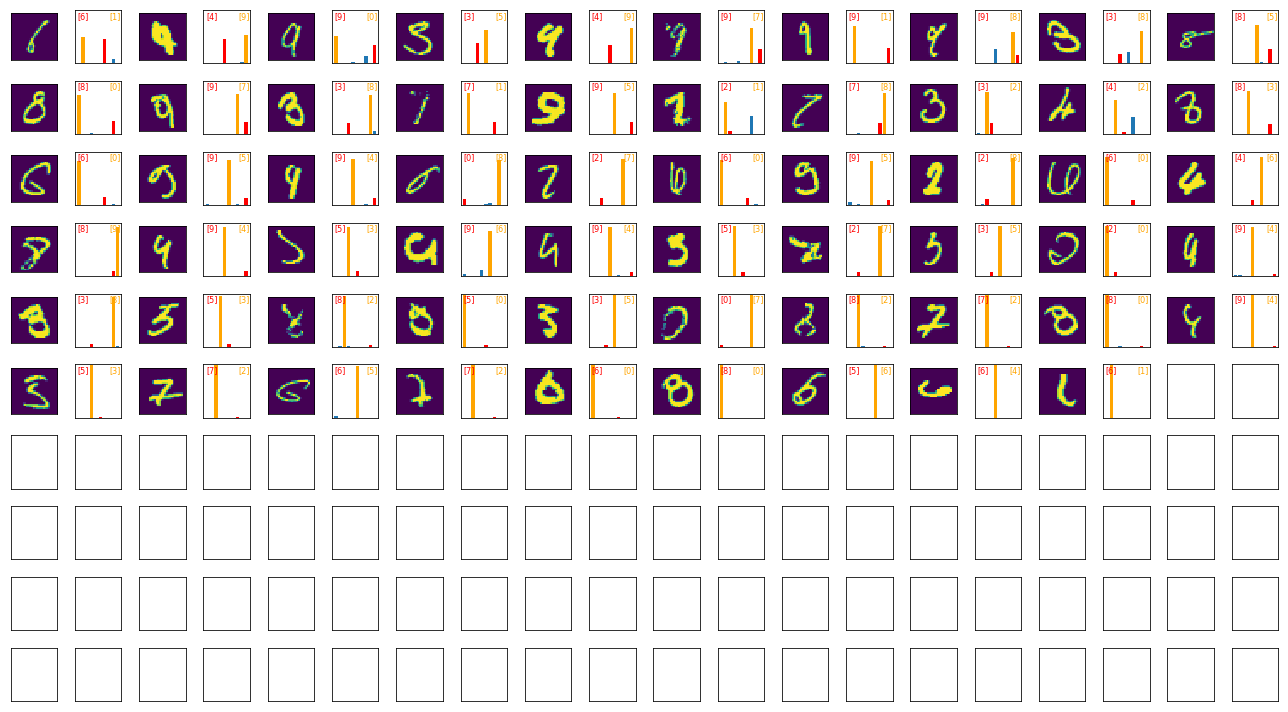

In [5]:
plot(Xm_cnn, Pm_cnn, Ym_cnn)
# plt.savefig("cnn_tf_tutorial_mnist_misclassified.pdf")
plt.show()

In [6]:
print(top_n_error(1, Pm_cnn, Ym_cnn))
print(top_n_error(2, Pm_cnn, Ym_cnn))
print(top_n_error(3, Pm_cnn, Ym_cnn))

0.59
0.08
0.01


In [7]:
test_log_likelihood(Pm_cnn, Ym_cnn)

-3.0578945

# Indexed Conv GP

In [8]:
results = np.load("weighted_conv_gp_results.npz")
Pm_gp, Xm_gp, Ym_gp = results["Pm"], results["Xm"], results["Ym_true"]

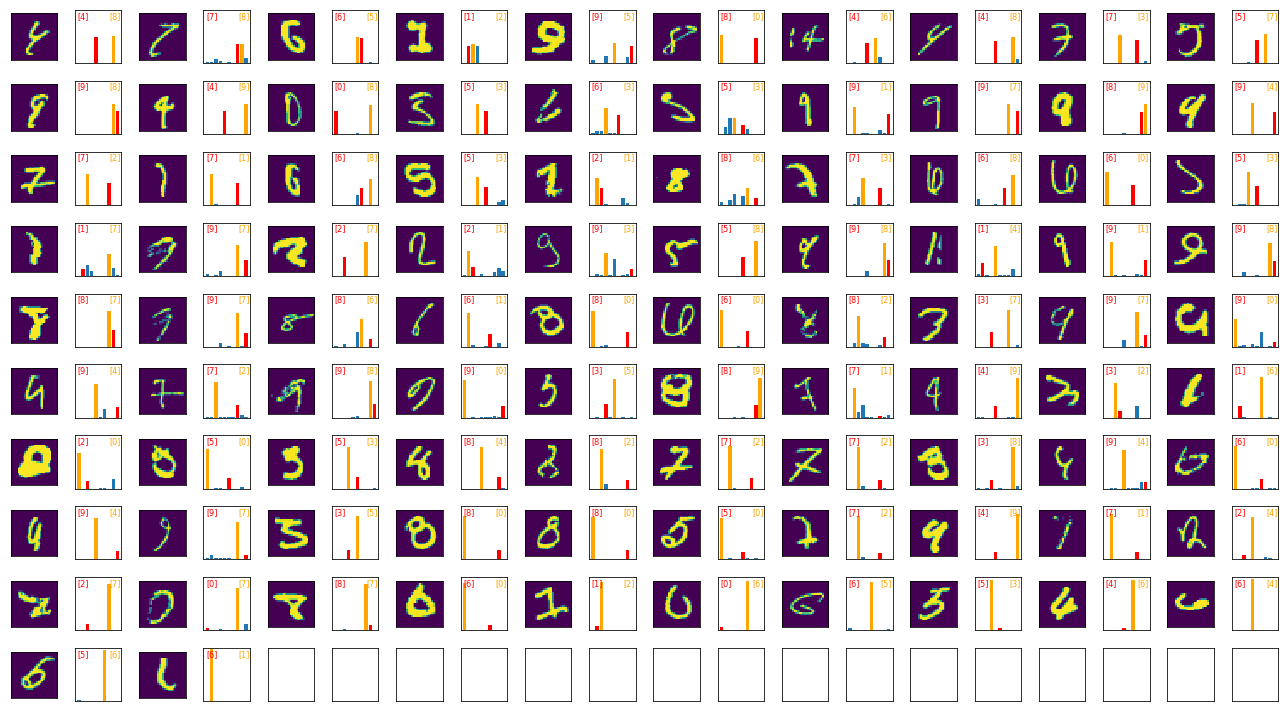

In [9]:
plot(Xm_gp, Pm_gp, Ym_gp)
# plt.savefig("convgp_mnist_misclassified.pdf")
plt.show()

In [10]:
print(top_n_error(1, Pm_gp, Ym_gp))
print(top_n_error(2, Pm_gp, Ym_gp))
print(top_n_error(3, Pm_gp, Ym_gp))

0.9199999999999999
0.13
0.05


In [11]:
test_log_likelihood(Pm_gp, Ym_gp)

-1.6998849243426035

In [15]:
_, _, Xs, Ys = data()

In [1]:
import gpflow
model = gpflow.Saver().load("mnist_new3/full_W_init_patches_patches-unique_kern_RBF_adam_decay_M_1000_minibatch_size_100_patch_5.gpflow")
model.compile()

ImportError: cannot import name 'IndexedConvolutional'

In [3]:
plt.GridSpec?

Init signature: plt.GridSpec(nrows, ncols, figure=None, left=None, bottom=None, right=None, top=None, wspace=None, hspace=None, width_ratios=None, height_ratios=None)
Docstring:     
A class that specifies the geometry of the grid that a subplot
will be placed. The location of grid is determined by similar way
as the SubplotParams.
Init docstring:
The number of rows and number of columns of the grid need to be set.
Optionally, the subplot layout parameters (e.g., left, right, etc.)
can be tuned.

Parameters
----------
nrows : int
    Number of rows in grid.

ncols : int
    Number or columns in grid.

figure : ~.figure.Figure, optional

left, right, top, bottom : float
    Extent of the subplots as a fraction of figure width or height.
    Left cannot be larger than right, and bottom cannot be larger than
    top.

wspace : float
    The amount of width reserved for space between subplots,
    expressed as a fraction of the average axis width.

hspace : float
    The amount of height r

In [4]:
mnist = obs.mnist('~/.datasets')

In [5]:
imgs = mnist[0][0][[400, 6000], ...]

NameError: name 'imgs' is not defined

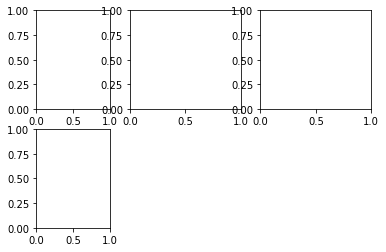

In [3]:
fig = plt.figure()
gs = plt.GridSpec(2, 3, width_ratios=[1, 1.5, 1.5], figure=fig)
ax00 = plt.subplot(gs[0, 0])
ax01 = plt.subplot(gs[0, 1])
ax03 = plt.subplot(gs[0, 2])
ax10 = plt.subplot(gs[1, 0])

ax00.imshow(imgs[0].reshape(28, 28))
ax10.imshow(imgs[1].reshape(28, 28))
fig.show()

In [8]:
ax = fig.axes[0]

In [12]:
sub = gs[0, 0]


In [20]:
ax00.set_title("wow")

Text(0.5, 1.0, 'wow')

In [21]:
fig.show()

/Users/artemav/anaconda3/envs/tf/lib/python3.6/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


In [22]:
"wow".upper()

'WOW'